## Importing Library

In [1]:
import pandas as pd
import numpy as np


## Data Ingestion 

In [2]:
df = pd.read_csv('players_22.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_11976\3399434548.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


## Taking particualr column only

In [3]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [4]:
players = df.dropna(subset = features)

In [5]:
df = players[features].copy()

In [6]:
df.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


In [7]:
df.tail()

,overall,potential,wage_eur,value_eur,age
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19
19238,47,60,500.0,110000.0,19


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19165 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19165 non-null  int64  
 1   potential  19165 non-null  int64  
 2   wage_eur   19165 non-null  float64
 3   value_eur  19165 non-null  float64
 4   age        19165 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 898.4 KB


In [9]:
df.columns

Index(['overall', 'potential', 'wage_eur', 'value_eur', 'age'], dtype='object')

In [10]:
df.shape

(19165, 5)

## High level steps for the algorithm implementation

# 1. Scale data to standardize values

# 2. Initialize random centroids

# 3. Get labels of each data point

# 4. Create new centroids

# 5. Plot the centroids

# 6. Repeat 3-5 until the centroids stop changing

In [11]:
df = ((df - df.min()) / (df.max() - df.min())) * 10 + 1

In [12]:
df.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [13]:
df.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [14]:
# setting up the random centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [15]:
centroids = random_centroids(df, 5)

C:\Users\PC\AppData\Local\Temp\ipykernel_11976\291553174.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [16]:
centroids

,0,1,2,3,4
overall,4.695652,4.913043,4.043478,6.434783,7.086957
potential,5.130435,4.913043,6.000000,6.869565,5.565217
wage_eur,1.987124,1.071531,1.100143,1.214592,1.185980
value_eur,1.012423,1.024022,1.128408,1.009330,1.071704
age,7.296296,5.444444,4.333333,4.703704,2.111111


In [17]:
def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [18]:
labels = get_labels(df, centroids)

In [19]:
labels.value_counts()


2    7232
3    5377
1    4452
0    1765
4     339
Name: count, dtype: int64

In [20]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [22]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

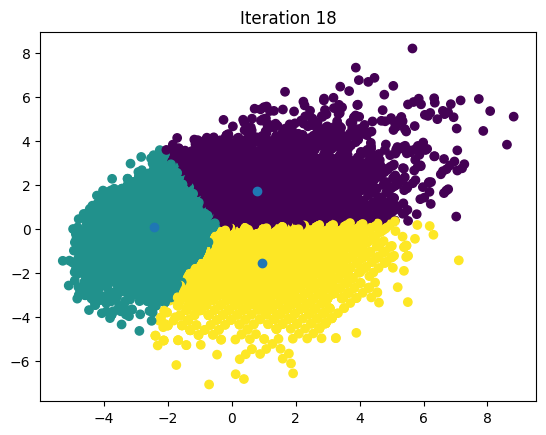

In [23]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

In [24]:
centroids


,0,1,2
overall,6.324628,3.436536,5.200636
potential,7.100439,5.357557,4.894208
wage_eur,1.456630,1.031374,1.130961
value_eur,1.311183,1.029343,1.049892
age,3.874397,2.674807,5.963956


In [25]:
# counting 
labels.value_counts()

2    7188
1    6162
0    5815
Name: count, dtype: int64